In [5]:
!pwd

/ssl-jet-vol/hbb_interaction_network/notebooks


In [1]:
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
from sklearn.metrics import auc

plt.style.use(hep.style.ROOT)

In [2]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

### Performance on low pT domain ($p_T < 1.5$ GeV)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1e-05, 100)

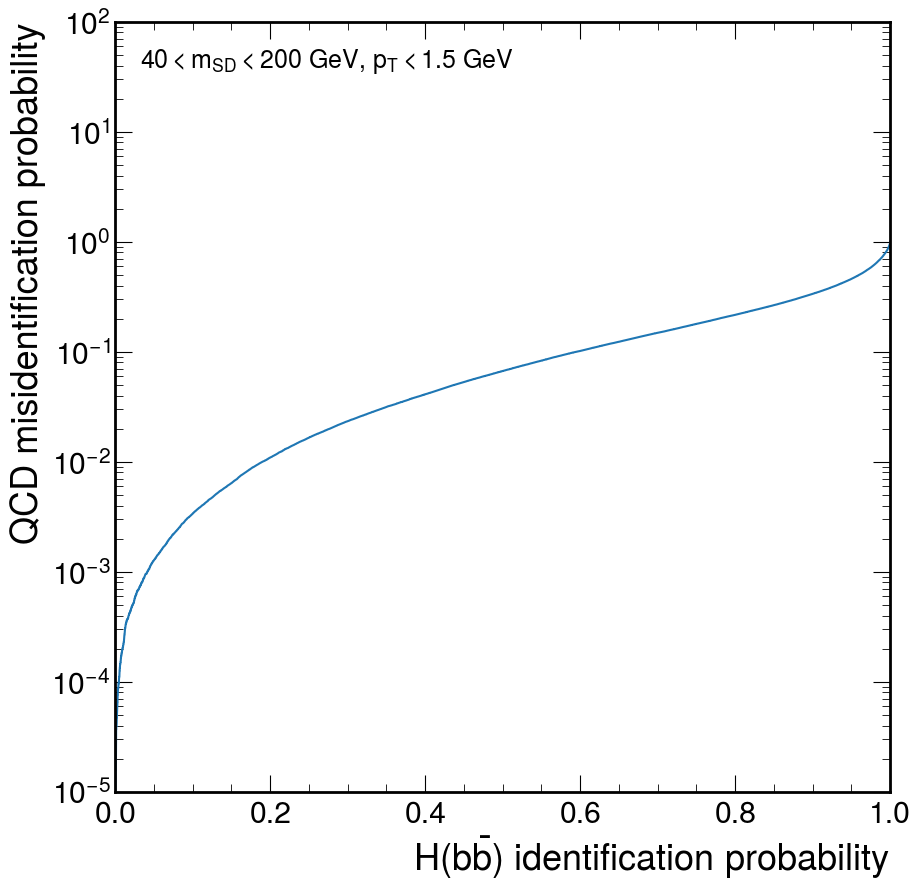

In [12]:
min_msd = 40.0
max_msd = 200.0
model_name = "gnn_min_pt_psv_best"
model_label = "IN(particles, SVs)"
plt.figure()

model_perf_loc = "models/model_performances/"
pu_label = "max_pt"

fpr = np.load(f"/ssl-jet-vol/hbb_interaction_network/{model_perf_loc}{pu_label}/{model_name}_test_fpr_{pu_label}.npy")
tpr = np.load(f"/ssl-jet-vol/hbb_interaction_network/{model_perf_loc}{pu_label}/{model_name}_test_tpr_{pu_label}.npy")
plabel = (
    f"{model_label}\n"
    + f"AUC = {auc(fpr, tpr)*100:.1f}%, "
    + f"$\epsilon_S(\epsilon_B=10^{{-2}})$ = {tpr[find_nearest(fpr, 0.01)]*100:.1f}%"  # noqa: W605
)
plt.semilogy()
plt.legend(
    title=(
        f"${min_msd:.0f} < m_{{SD}} < {max_msd:.0f}$ GeV, "
        + f"$p_T < 1.5$ GeV"
    ),
    loc="upper left",
    fontsize=18,
    title_fontsize=18,
)
plt.plot(tpr, fpr, label="AUC: 87.3", ls="-")
plt.xlabel(r"$H(b\bar{b})$ identification probability")
plt.ylabel("QCD misidentification probability")
plt.xlim([0, 1])
plt.ylim([1e-5, 100])

In [11]:
auc(fpr, tpr)*100

87.28757728966315

### Performance on high pT domain ($p_T > 1.5$ GeV)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1e-05, 100)

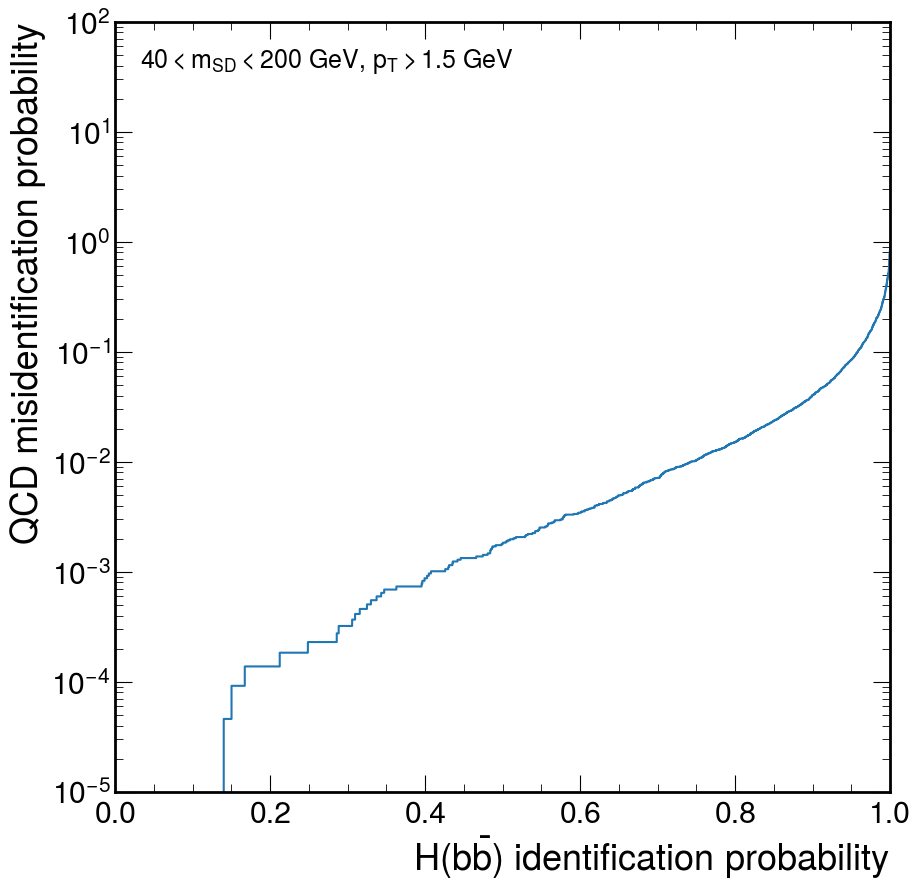

In [13]:
min_msd = 40.0
max_msd = 200.0
model_name = "gnn_min_pt_psv_best"
model_label = "IN(particles, SVs)"
plt.figure()

model_perf_loc = "models/model_performances/"
pu_label = "min_pt"

fpr = np.load(f"/ssl-jet-vol/hbb_interaction_network/{model_perf_loc}{pu_label}/{model_name}_test_fpr_{pu_label}.npy")
tpr = np.load(f"/ssl-jet-vol/hbb_interaction_network/{model_perf_loc}{pu_label}/{model_name}_test_tpr_{pu_label}.npy")
plabel = (
    f"{model_label}\n"
    + f"AUC = {auc(fpr, tpr)*100:.1f}%, "
    + f"$\epsilon_S(\epsilon_B=10^{{-2}})$ = {tpr[find_nearest(fpr, 0.01)]*100:.1f}%"  # noqa: W605
)
plt.semilogy()
plt.legend(
    title=(
        f"${min_msd:.0f} < m_{{SD}} < {max_msd:.0f}$ GeV, "
        + f"$p_T > 1.5$ GeV"
    ),
    loc="upper left",
    fontsize=18,
    title_fontsize=18,
)
plt.plot(tpr, fpr, label=plabel, ls="-")
plt.xlabel(r"$H(b\bar{b})$ identification probability")
plt.ylabel("QCD misidentification probability")
plt.xlim([0, 1])
plt.ylim([1e-5, 100])

In [14]:
auc(fpr, tpr)*100

98.21660528640956

### Overlayed plots

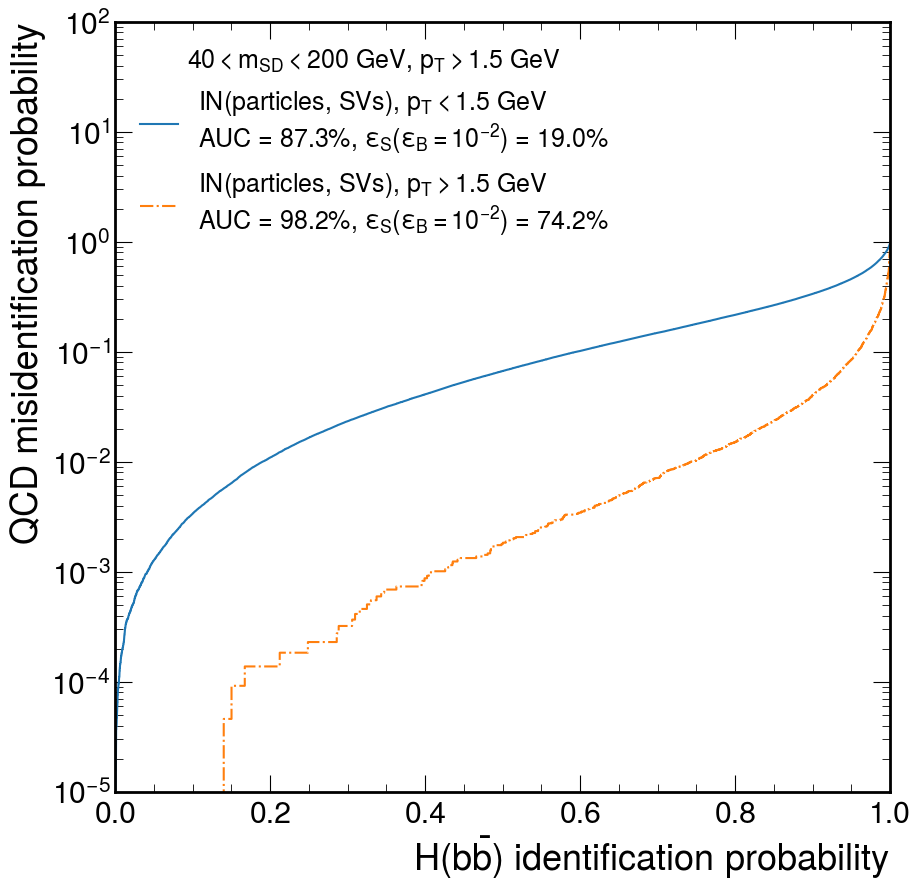

In [22]:
min_msd = 40.0
max_msd = 200.0
model_name = "gnn_min_pt_psv_best"
model_label = "IN(particles, SVs)"

lines = ["-", "-.", (0, (1, 10))]
pu_labels = ["max_pt", "min_pt"]


plt.figure()
for pu_label, line in zip(pu_labels, lines):
    if pu_label == "max_pt":
        pu_tag = r"$p_T < 1.5$ GeV"
    else:
        pu_tag = r"$p_T > 1.5$ GeV"
    model_perf_loc = "models/model_performances"

    fpr = np.load(f"/ssl-jet-vol/hbb_interaction_network/{model_perf_loc}/{pu_label}/{model_name}_test_fpr_{pu_label}.npy")
    tpr = np.load(f"/ssl-jet-vol/hbb_interaction_network/{model_perf_loc}/{pu_label}/{model_name}_test_tpr_{pu_label}.npy")
    plabel = (
        f"{model_label}, {pu_tag}\n"
        + f"AUC = {auc(fpr, tpr)*100:.1f}%, "
        + f"$\epsilon_S(\epsilon_B=10^{{-2}})$ = {tpr[find_nearest(fpr, 0.01)]*100:.1f}%"  # noqa: W605
    )
    plt.plot(tpr, fpr, label=plabel, ls=line)
plt.semilogy()
plt.legend(
    title=(
        f"${min_msd:.0f} < m_{{SD}} < {max_msd:.0f}$ GeV, "
        + f"{pu_tag}"
    ),
    loc="upper left",
    fontsize=18,
    title_fontsize=18,
)
plt.xlabel(r"$H(b\bar{b})$ identification probability")
plt.ylabel("QCD misidentification probability")
plt.xlim([0, 1])
plt.ylim([1e-5, 100])
plt.savefig(f"roc_pT.pdf")
plt.savefig(f"roc_pT.png")